## Tool Log Exploratory Data Analysis

### Setup

In [40]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import plotly.graph_objects as go

### Load Data & Initial Preview

In [3]:
# Set up path to the CSV data in the parent folder's 'data' directory
current_dir = Path.cwd()
data_path = current_dir.parent / "data" / "mock_tool_log_final.csv"

# Load the CSV
df = pd.read_csv(data_path, parse_dates=["start_time", "end_time"])

In [4]:
df.head()

,tool_id,tool_status,merge_key,start_time,end_time
0,TOOL_001,Scheduled Downtime; Preventive Maintenance; Bi...,1,2024-04-01 00:00:00,2024-04-01 04:00:00
1,TOOL_001,Scheduled Downtime; User Maintenance Delay;,2,2024-04-01 04:00:00,2024-04-01 06:00:00
2,TOOL_001,Scheduled Downtime; Preventive Maintenance; Bi...,3,2024-04-01 06:00:00,2024-04-01 08:00:00
3,TOOL_001,Productive; Engineering Runs; Post Maintenance...,4,2024-04-01 08:00:00,2024-04-01 10:00:00
4,TOOL_001,Productive; Regular Production,5,2024-04-01 10:00:00,2024-04-01 13:00:00


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40982 entries, 0 to 40981
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   tool_id      40982 non-null  object        
 1   tool_status  40982 non-null  object        
 2   merge_key    40982 non-null  int64         
 3   start_time   40982 non-null  datetime64[ns]
 4   end_time     40982 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 1.6+ MB


In [9]:
df.shape

(40982, 5)

In [7]:
df.isnull().sum()

tool_id        0
tool_status    0
merge_key      0
start_time     0
end_time       0
dtype: int64

In [8]:
df.nunique()

tool_id           12
tool_status       12
merge_key      40982
start_time      8735
end_time        8735
dtype: int64

In [6]:
df["tool_status"].unique()

array(['Scheduled Downtime; Preventive Maintenance; Bi-Weekly PM',
       'Scheduled Downtime; User Maintenance Delay;',
       'Productive; Engineering Runs; Post Maintenance Qual',
       'Productive; Regular Production', 'Standby; No Product',
       'Unscheduled Downtime; User Maintenance Delay',
       'Unscheduled Downtime; Repair; Repair - Repair',
       'Standby; No Operator; Waiting For Carrier Delivery/Pickup',
       'Productive; Engineering Runs; Service Routine - Do Not Reload',
       'Productive; Engineering Runs; Processing - Do Not Reload',
       'Productive; Engineering Runs; Holding for Priority Lot',
       'Unscheduled Downtime; Supplier Maintenance Delay; Waiting for Parts (Vendor)'],
      dtype=object)

### Preclean

#### Drop merge_key if exists

In [10]:
if "merge_key" in df.columns:
    df = df.drop(columns=["merge_key"])

In [11]:
df.head()

,tool_id,tool_status,start_time,end_time
0,TOOL_001,Scheduled Downtime; Preventive Maintenance; Bi...,2024-04-01 00:00:00,2024-04-01 04:00:00
1,TOOL_001,Scheduled Downtime; User Maintenance Delay;,2024-04-01 04:00:00,2024-04-01 06:00:00
2,TOOL_001,Scheduled Downtime; Preventive Maintenance; Bi...,2024-04-01 06:00:00,2024-04-01 08:00:00
3,TOOL_001,Productive; Engineering Runs; Post Maintenance...,2024-04-01 08:00:00,2024-04-01 10:00:00
4,TOOL_001,Productive; Regular Production,2024-04-01 10:00:00,2024-04-01 13:00:00


#### Split tool_status into levels

In [12]:
df[["status_level_1", "status_level_2", "status_level_3"]] = df["tool_status"].str.split(";", n=2, expand=True)
df[["status_level_1", "status_level_2", "status_level_3"]] = df[["status_level_1", "status_level_2", "status_level_3"]].apply(lambda x: x.str.strip())


In [13]:
df.head()

,tool_id,tool_status,start_time,end_time,status_level_1,status_level_2,status_level_3
0,TOOL_001,Scheduled Downtime; Preventive Maintenance; Bi...,2024-04-01 00:00:00,2024-04-01 04:00:00,Scheduled Downtime,Preventive Maintenance,Bi-Weekly PM
1,TOOL_001,Scheduled Downtime; User Maintenance Delay;,2024-04-01 04:00:00,2024-04-01 06:00:00,Scheduled Downtime,User Maintenance Delay,
2,TOOL_001,Scheduled Downtime; Preventive Maintenance; Bi...,2024-04-01 06:00:00,2024-04-01 08:00:00,Scheduled Downtime,Preventive Maintenance,Bi-Weekly PM
3,TOOL_001,Productive; Engineering Runs; Post Maintenance...,2024-04-01 08:00:00,2024-04-01 10:00:00,Productive,Engineering Runs,Post Maintenance Qual
4,TOOL_001,Productive; Regular Production,2024-04-01 10:00:00,2024-04-01 13:00:00,Productive,Regular Production,None


In [ ]:
df = df.sort_values(by=["tool_id", "start_time"]).reset_index(drop=True)

#### Add duration in minutes

In [14]:
df["duration_min"] = (df["end_time"] - df["start_time"]).dt.total_seconds() / 60

In [15]:
df.head()

,tool_id,tool_status,start_time,end_time,status_level_1,status_level_2,status_level_3,duration_min
0,TOOL_001,Scheduled Downtime; Preventive Maintenance; Bi...,2024-04-01 00:00:00,2024-04-01 04:00:00,Scheduled Downtime,Preventive Maintenance,Bi-Weekly PM,240.0
1,TOOL_001,Scheduled Downtime; User Maintenance Delay;,2024-04-01 04:00:00,2024-04-01 06:00:00,Scheduled Downtime,User Maintenance Delay,,120.0
2,TOOL_001,Scheduled Downtime; Preventive Maintenance; Bi...,2024-04-01 06:00:00,2024-04-01 08:00:00,Scheduled Downtime,Preventive Maintenance,Bi-Weekly PM,120.0
3,TOOL_001,Productive; Engineering Runs; Post Maintenance...,2024-04-01 08:00:00,2024-04-01 10:00:00,Productive,Engineering Runs,Post Maintenance Qual,120.0
4,TOOL_001,Productive; Regular Production,2024-04-01 10:00:00,2024-04-01 13:00:00,Productive,Regular Production,None,180.0


### Time Coverage

In [16]:
df["start_time"].min()

Timestamp('2024-04-01 00:00:00')

In [17]:
df["end_time"].max()

Timestamp('2025-04-01 00:00:00')

### Tool-Level Duration Overview

In [33]:
duration_by_tool = df.groupby(["tool_id", "status_level_1"])["duration_min"].sum().unstack(fill_value=0)

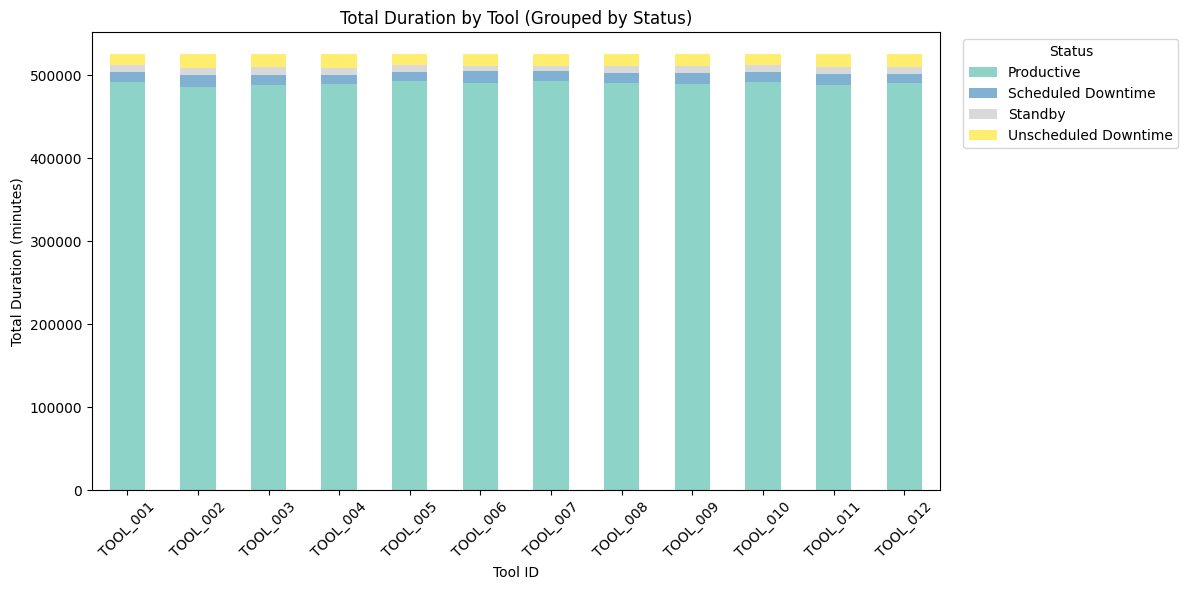

In [39]:
duration_by_tool.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="Set3",
    title="Total Duration by Tool (Grouped by Status)"
)
plt.ylabel("Total Duration (minutes)")
plt.xlabel("Tool ID")
plt.xticks(rotation=45)
plt.legend(title="Status", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

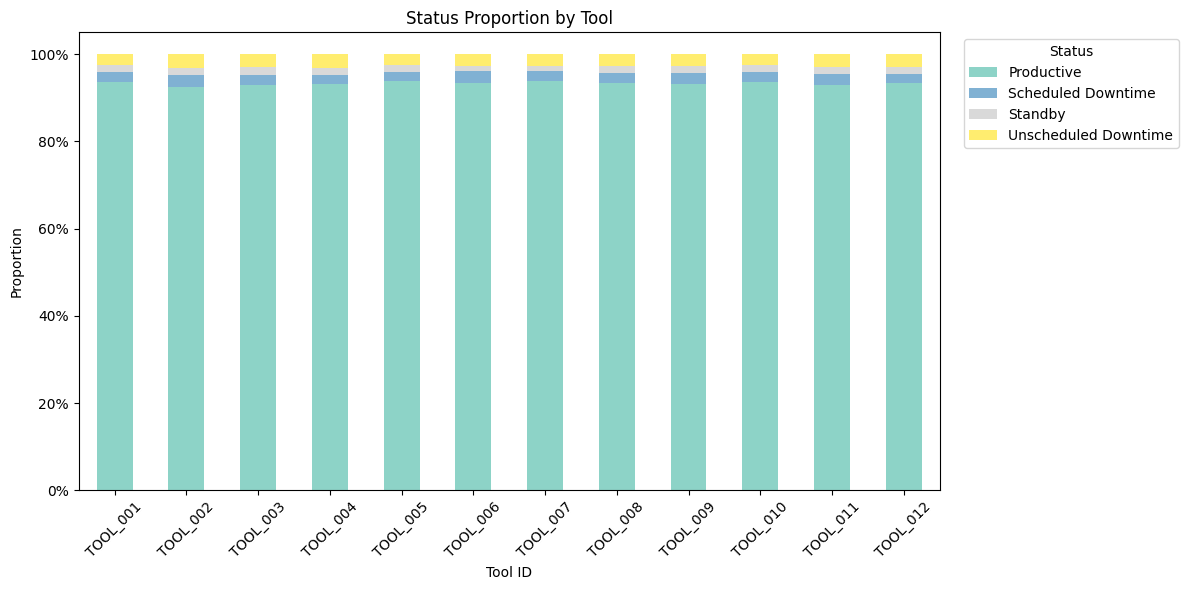

In [38]:
tool_ratio = duration_by_tool.div(duration_by_tool.sum(axis=1), axis=0)

tool_ratio.plot(
    kind="bar",
    stacked=True,
    figsize=(12, 6),
    colormap="Set3",
    title="Status Proportion by Tool"
)
plt.ylabel("Proportion")
plt.xlabel("Tool ID")
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))
plt.xticks(rotation=45)
plt.legend(title="Status", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

### Duration by Tool by Month by Status Category

In [21]:
df["month"] = df["start_time"].dt.to_period("M").astype(str)
monthly_status_duration = df.groupby(["tool_id", "month", "status_level_1"])["duration_min"].sum().reset_index()

In [22]:
monthly_status_duration

,tool_id,month,status_level_1,duration_min
0,TOOL_001,2024-04,Productive,39900.0
1,TOOL_001,2024-04,Scheduled Downtime,900.0
2,TOOL_001,2024-04,Standby,540.0
3,TOOL_001,2024-04,Unscheduled Downtime,2040.0
4,TOOL_001,2024-05,Productive,42000.0
...,...,...,...,...
568,TOOL_012,2025-02,Unscheduled Downtime,1020.0
569,TOOL_012,2025-03,Productive,42120.0
570,TOOL_012,2025-03,Scheduled Downtime,540.0
571,TOOL_012,2025-03,Standby,1020.0


In [25]:
monthly_status_duration_pivot = monthly_status_duration.pivot(index=["tool_id", "month"], columns="status_level_1", values="duration_min").fillna(0)

In [26]:
monthly_status_duration_pivot

status_level_1    Productive  Scheduled Downtime  Standby  \
tool_id  month                                              
TOOL_001 2024-04     39900.0               900.0    540.0   
         2024-05     42000.0               720.0   1260.0   
         2024-06     40740.0               960.0    600.0   
         2024-07     39420.0              2280.0    480.0   
         2024-08     41940.0              1200.0   1140.0   
...                      ...                 ...      ...   
TOOL_012 2024-11     40380.0              1560.0    480.0   
         2024-12     41640.0               720.0    240.0   
         2025-01     41880.0              1260.0    120.0   
         2025-02     37980.0               900.0    480.0   
         2025-03     42120.0               540.0   1020.0   

status_level_1    Unscheduled Downtime  
tool_id  month                          
TOOL_001 2024-04                2040.0  
         2024-05                 600.0  
         2024-06                 900.0  
         2024-07                2460.0  
         2024-08                 240.0  
...                                ...  
TOOL_012 2024-11                 780.0  
         2024-12                2040.0  
         2025-01                1320.0  
         2025-02                1020.0  
         2025-03                 900.0  

[144 rows x 4 columns]

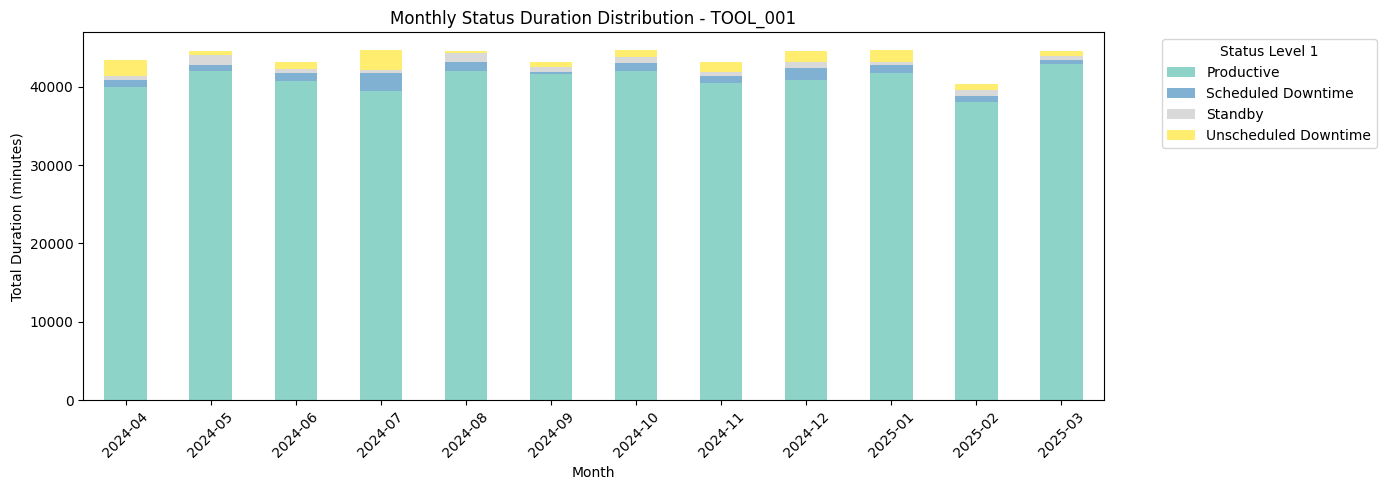

In [37]:
pivot_tool_1 = monthly_status_duration_pivot.loc["TOOL_001"]
pivot_tool_1.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 5),
    colormap="Set3",
    title="Monthly Status Duration Distribution - TOOL_001"
)
plt.ylabel("Total Duration (minutes)")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Status Level 1", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [30]:
pivot_ratio = pivot_tool_1.div(pivot_tool_1.sum(axis=1), axis=0)


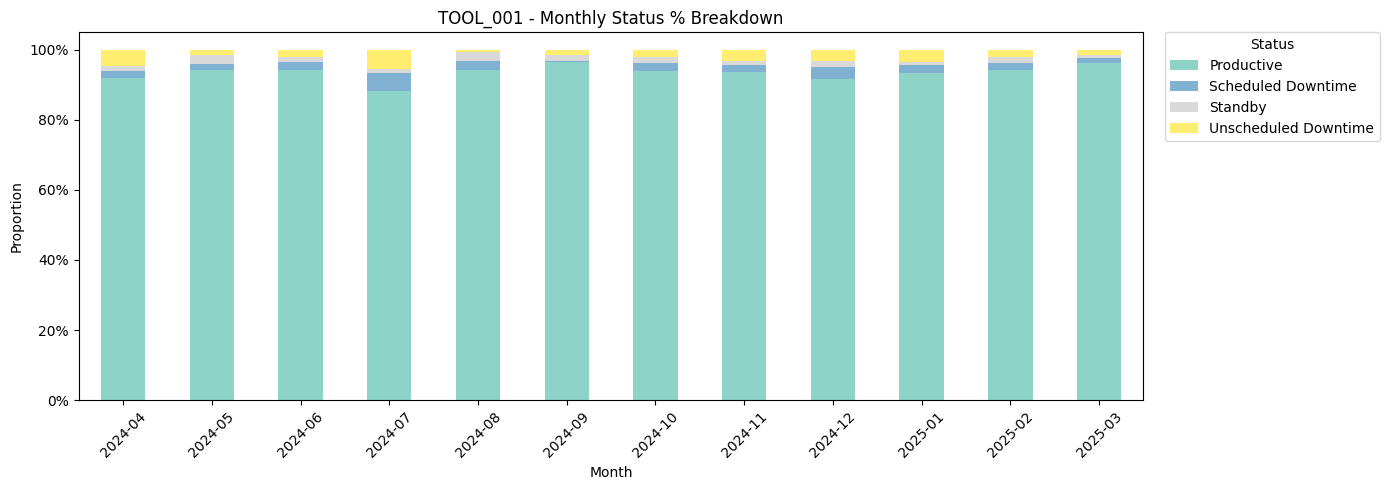

In [32]:
pivot_ratio.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 5),
    colormap="Set3",
    title="TOOL_001 - Monthly Status % Breakdown"
)

plt.ylabel("Proportion")
plt.xlabel("Month")
plt.xticks(rotation=45)

# y axis->percentage
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))

# adjust legend placement
plt.legend(
    title="Status",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0.
)

plt.tight_layout()
plt.show()